### **1. How are coefficients affected?**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['TARGET'] = data.target

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=2)


In [6]:
coef = []
r2_scores = []

for i in [0, 0.1, 1, 10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)

    coef.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))


c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

Text(0.5, 1.0, 'Alpha = 10, r2_score = -0.01')

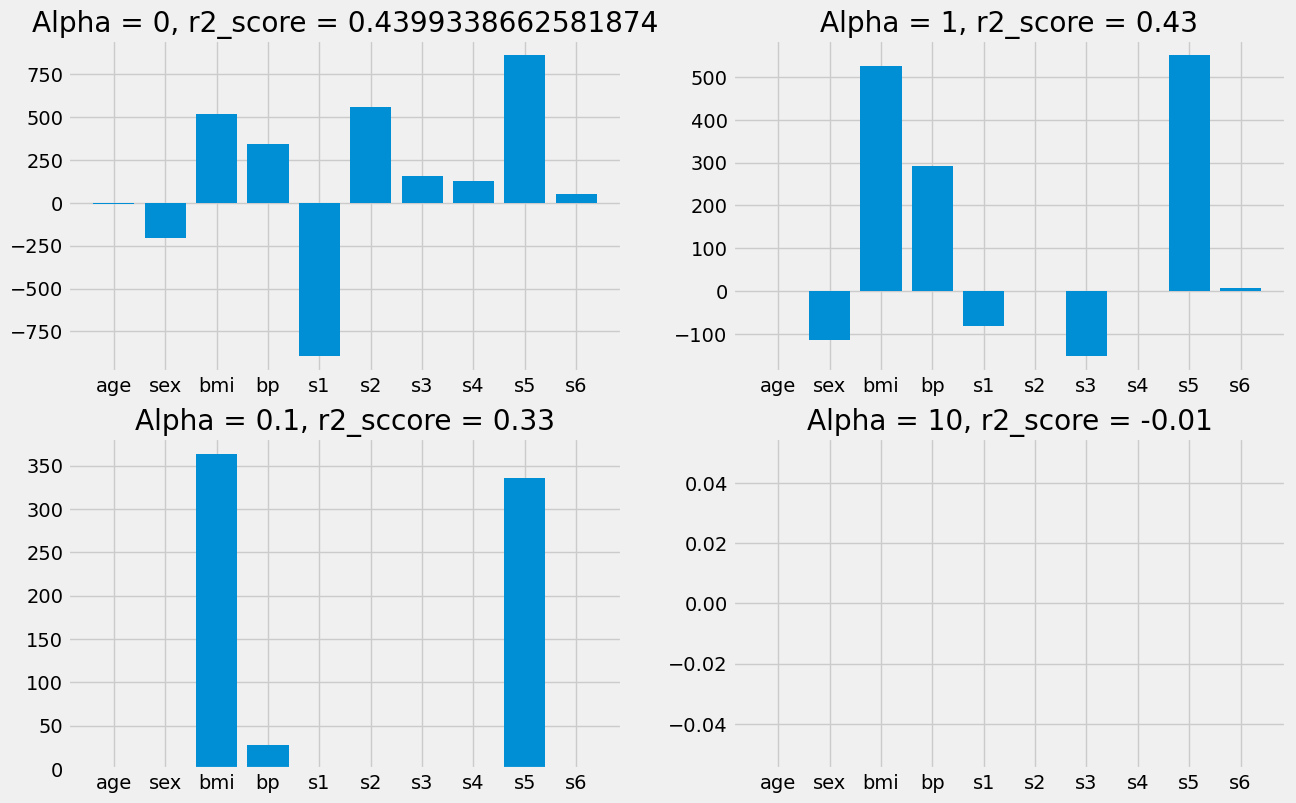

In [10]:
plt.figure(figsize=(14, 9))
plt.subplot(221)
plt.bar(data.feature_names, coef[0])
plt.title('Alpha = 0, r2_score = {}'.format(r2_scores[0], 2))

plt.subplot(222)
plt.bar(data.feature_names, coef[1])
plt.title('Alpha = 1, r2_score = {}'.format(round(r2_scores[1], 2)))

plt.subplot(223)
plt.bar(data.feature_names, coef[2])
plt.title('Alpha = 0.1, r2_sccore = {}'.format(round(r2_scores[2], 2)))

plt.subplot(224)
plt.bar(data.feature_names, coef[3])
plt.title('Alpha = 10, r2_score = {}'.format(round(r2_scores[3], 2)))


### **2. Higher Certificients are affected more**

In [32]:
alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10]
coef = []
for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)

    coef.append(reg.coef_.tolist())


c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

In [33]:
input_array = np.array(coef)

coef_df = pd.DataFrame(input_array, columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [34]:
input_array = np.array(coef).T
input_array


array([[  -9.15865318,   -9.06906443,   -8.26276976,   -1.35972089,
           0.        ,    0.        ,    0.        ],
       [-205.45432152, -205.32940644, -204.20536429, -192.93718018,
        -113.96992829,    0.        ,    0.        ],
       [ 516.69374477,  516.78941848,  517.65007282,  526.35651446,
         526.74439601,  363.88574216,    0.        ],
       [ 340.61999899,  340.53237885,  339.7439007 ,  332.6411011 ,
         292.62847198,   27.27316304,    0.        ],
       [-895.55198905, -888.66090377, -826.6636033 , -430.22697505,
         -82.69368149,    0.        ,    0.        ],
       [ 561.22066898,  555.95858353,  508.61739504,  191.29547987,
          -0.        ,    0.        ,    0.        ],
       [ 153.89310382,  150.5936554 ,  120.90860746,  -44.03491271,
        -152.68533835,   -0.        ,   -0.        ],
       [ 126.73139522,  125.45014323,  113.92177296,   68.98898658,
           0.        ,    0.        ,    0.        ],
       [ 861.12699676,  

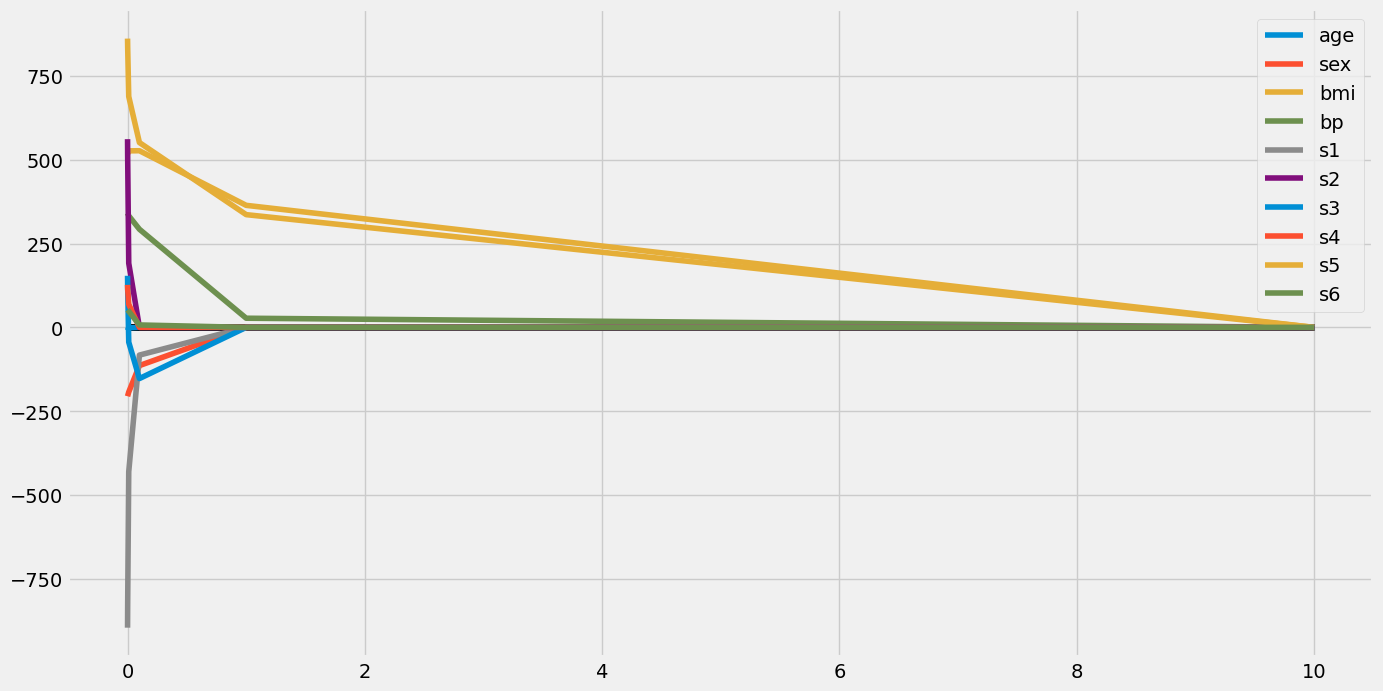

In [35]:
plt.figure(figsize=(15, 8))
plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas, input_array[i], label=data.feature_names[i])
plt.legend()


### **3.Impact on Bias and Variance**

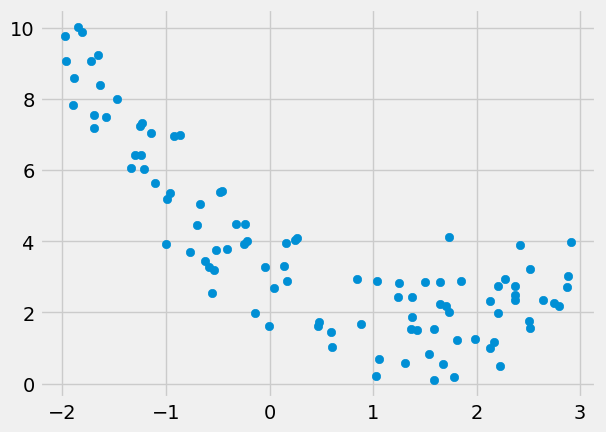

In [43]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X.reshape(100, 1), y.reshape(100), test_size=0.2, random_state=2)


In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
y_train = poly.transform(X_test)


In [ ]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0, 30, 100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=123
    )

    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)


### **4.Effefct of Regularization on Loss Function**

[27.82809103]
-2.29474455867698


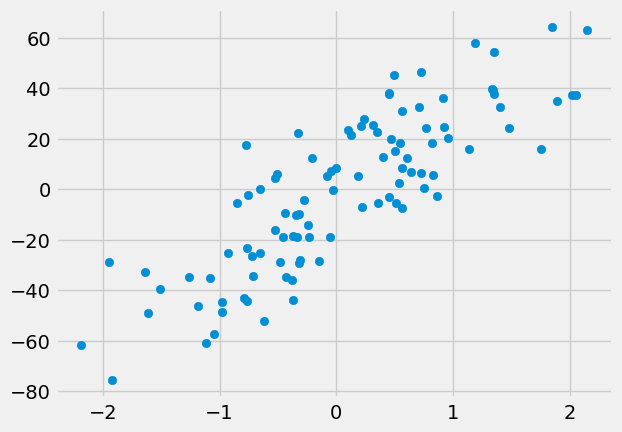

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,
                       noise=20, random_state=13)
plt.scatter(X, y)

reg = LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)


In [51]:
def cal_loss(m, alpha):
    return np.sum((y - m * X.ravel() + 2.29) ** 2) + alpha * abs(m)


def predict(m):
    return m*X - 2.29


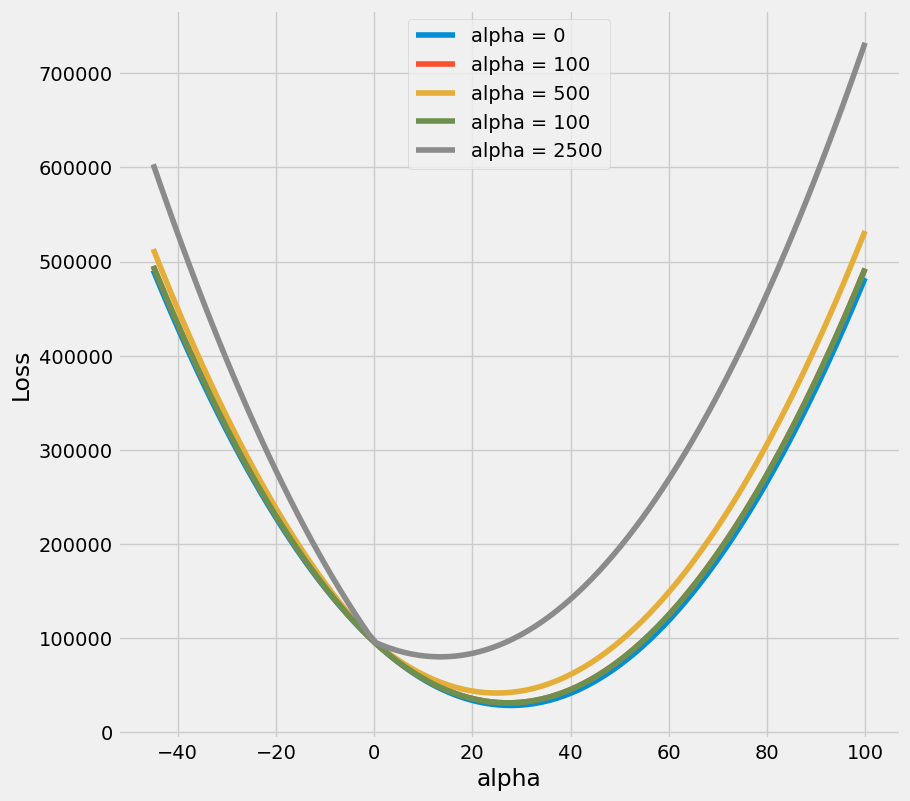

In [55]:
m = np.linspace(-45, 100, 100)
plt.figure(figsize=(9, 9))
for j in [0, 100, 500, 100, 2500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i], j)
        loss.append(loss_i)
    plt.plot(m, loss, label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Loss')
plt.show()
